In [156]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6120325944945878603
 xla_global_id: -1]

In [157]:
import numpy as np
import tensorflow as tf                            # tensorflow 기본 import
from tensorflow.keras.models import Sequential     # model box 구성
from tensorflow.keras.layers import Flatten, Dense # model 안의 input layer와 output layer를 구성
from tensorflow.keras.optimizers import SGD        # 알고리즘 담당
from sklearn.model_selection import train_test_split # train Data,Test Data 분리
from sklearn.preprocessing import MinMaxScaler     # 데이터 정규화
# 컴퓨터는 큰 숫를 작은 수로
# 변경 0~1 사이 실수 값으로 변경

In [158]:
import pandas as pd
df = pd.read_csv("gpascore.csv")
df

,admit,gre,gpa,rank
0,0,380.0,3.21,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.33,4
...,...,...,...,...
421,1,750.0,3.44,4
422,1,710.0,3.66,4
423,0,450.0,3.25,4
424,1,760.0,3.76,2


In [159]:
cols = df.keys()
cols

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [160]:
df.tail()

,admit,gre,gpa,rank
421,1,750.0,3.44,4
422,1,710.0,3.66,4
423,0,450.0,3.25,4
424,1,760.0,3.76,2
425,1,710.0,3.82,3


In [161]:
df.shape

(426, 4)

In [162]:
x_data = df.drop('admit',axis=1 ,inplace=False)
y_data = df['admit']

In [163]:
x_data.shape

(426, 3)

In [164]:
y_data.shape

(426,)

In [165]:
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)
print(norm_x_data)

[[0.27586207 0.57978723 0.66666667]
 [0.75862069 0.82446809 0.66666667]
 [1.         1.         0.        ]
 ...
 [0.39655172 0.60106383 1.        ]
 [0.93103448 0.87234043 0.33333333]
 [0.84482759 0.90425532 0.66666667]]


In [166]:
df.isnull().sum()

admit    0
gre      1
gpa      0
rank     0
dtype: int64

In [167]:
model = Sequential()

In [168]:
model.add(Flatten(input_shape=(3,)))
model.add(Dense(256, activation="tanh"))
model.add(Dense(128, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

In [169]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3)                 0         
                                                                 
 dense_23 (Dense)            (None, 256)               1024      
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34,049
Trainable params: 34,049
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.compile(optimizer=SGD(learning_rate=0.001),
             loss="mse",
             metrics=['accuracy']
             )

In [171]:
hist = model.fit(norm_x_data,
                y_data,
                epochs=1000,
                verbose=1,
                validation_split=0.2
                )

Epoch 1/1000
11/11 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.5412 - val_loss: nan - val_accuracy: 0.4651
Epoch 2/1000
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5412 - val_loss: nan - val_accuracy: 0.4651
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5412 - val_loss: nan - val_accuracy: 0.4651
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5412 - val_loss: nan - val_accuracy: 0.4651
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5412 - val_loss: nan - val_accuracy: 0.4651
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5412 - val_loss: nan - val_accuracy: 0.4651
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5412 - val_loss: nan - val_accuracy: 0.4651
Epoch 8/1000
11/11 [===========================

In [172]:
print(model.evaluate(norm_x_data, y_data))

14/14 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5258
[nan, 0.5258215665817261]


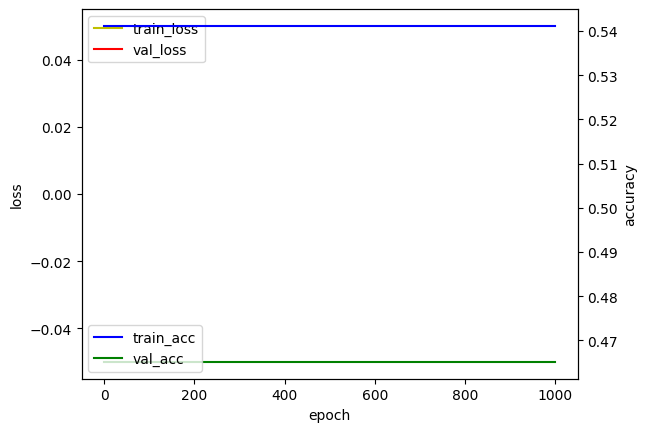

In [173]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")